# Machine Learning for Spotify datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import plotly.graph_objects as go
from pprint import pprint
from time import perf_counter
from sklearn.tree import plot_tree

%config InlineBackend.figure_format = 'retina' # Higher quality images for slides

In [2]:
train90 = pd.read_csv('output/train/train90.csv')
train00 = pd.read_csv('output/train/train00.csv')
train10 = pd.read_csv('output/train/train10.csv')

test90 = pd.read_csv('output/test/test90.csv')
test00 = pd.read_csv('output/test/test00.csv')
test10 = pd.read_csv('output/test/test10.csv')

In [3]:
# creating train and test sets for each year
# weeks-on-board -> Numerical
# charted -> Categorical

x_train90 = train90.drop(labels = ['track', 'artist', 'year', 'weeks-on-board', 'charted', 'key'], axis = 1)
y_train90 = train90[['charted']].values.ravel()
y_train90lin = train90[['weeks-on-board']].values.ravel()

x_test90 = test90.drop(labels = ['track', 'artist', 'year', 'weeks-on-board', 'charted', 'key'], axis = 1)
y_test90 = test90[['charted']].values.ravel()
y_test90lin = test90[['weeks-on-board']].values.ravel()

x_train00 = train00.drop(labels = ['track', 'artist', 'year', 'weeks-on-board', 'charted', 'key'], axis = 1)
y_train00 = train00[['charted']].values.ravel()
y_train00lin = train00[['weeks-on-board']].values.ravel()

x_test00 = test00.drop(labels = ['track', 'artist', 'year', 'weeks-on-board', 'charted', 'key'], axis = 1)
y_test00 = test00[['charted']].values.ravel()
y_test00lin = test00[['weeks-on-board']].values.ravel()

x_train10 = train10.drop(labels = ['track', 'artist', 'year', 'weeks-on-board', 'charted', 'key'], axis = 1)
y_train10 = train10[['charted']].values.ravel()
y_train10lin = train10[['weeks-on-board']].values.ravel()

x_test10 = test10.drop(labels = ['track', 'artist', 'year', 'weeks-on-board', 'charted', 'key'], axis = 1)
y_test10 = test10[['charted']].values.ravel()
y_test10lin = test10[['weeks-on-board']].values.ravel()

## Metric selection
We went through many options for metrics to be used over machine learning. In the end, we considered over accuracy, precision & recall, f1 score and area-under-the-curve. We ruled out accuracy, as it was a little too simple for our problem. We also decided that f1 score was better over precision and recall, as the f1 score balanced the pros and cons of the 2 metrics. We decided not to go with AUC as it was slightly overkill for us.

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance

# Selected metric
metric_score = f1_score
metrics = [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]

# Calculate scores across all chosen metrics
def metricscores(predicts):
    tests = [y_test90, y_test00, y_test10]
    scores = pd.DataFrame(columns = ['decade', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score'])
    for name, decade, predict in zip(['Decade 90', 'Decade 00', 'Decade 10'], predicts, tests):
        row = [name]
        for metric in metrics:
            row.append(metric(decade, predict))
        scores.loc[len(scores)] = row
        
    temp = ["Standard Deviation"]
    for column in scores.columns[1:]:
        temp.append(np.std(scores[column]))


    scores.loc[len(scores)] = temp
    return scores

## Linear regression

Our first point of data was weeks-on-board, so we started off with linear regression.

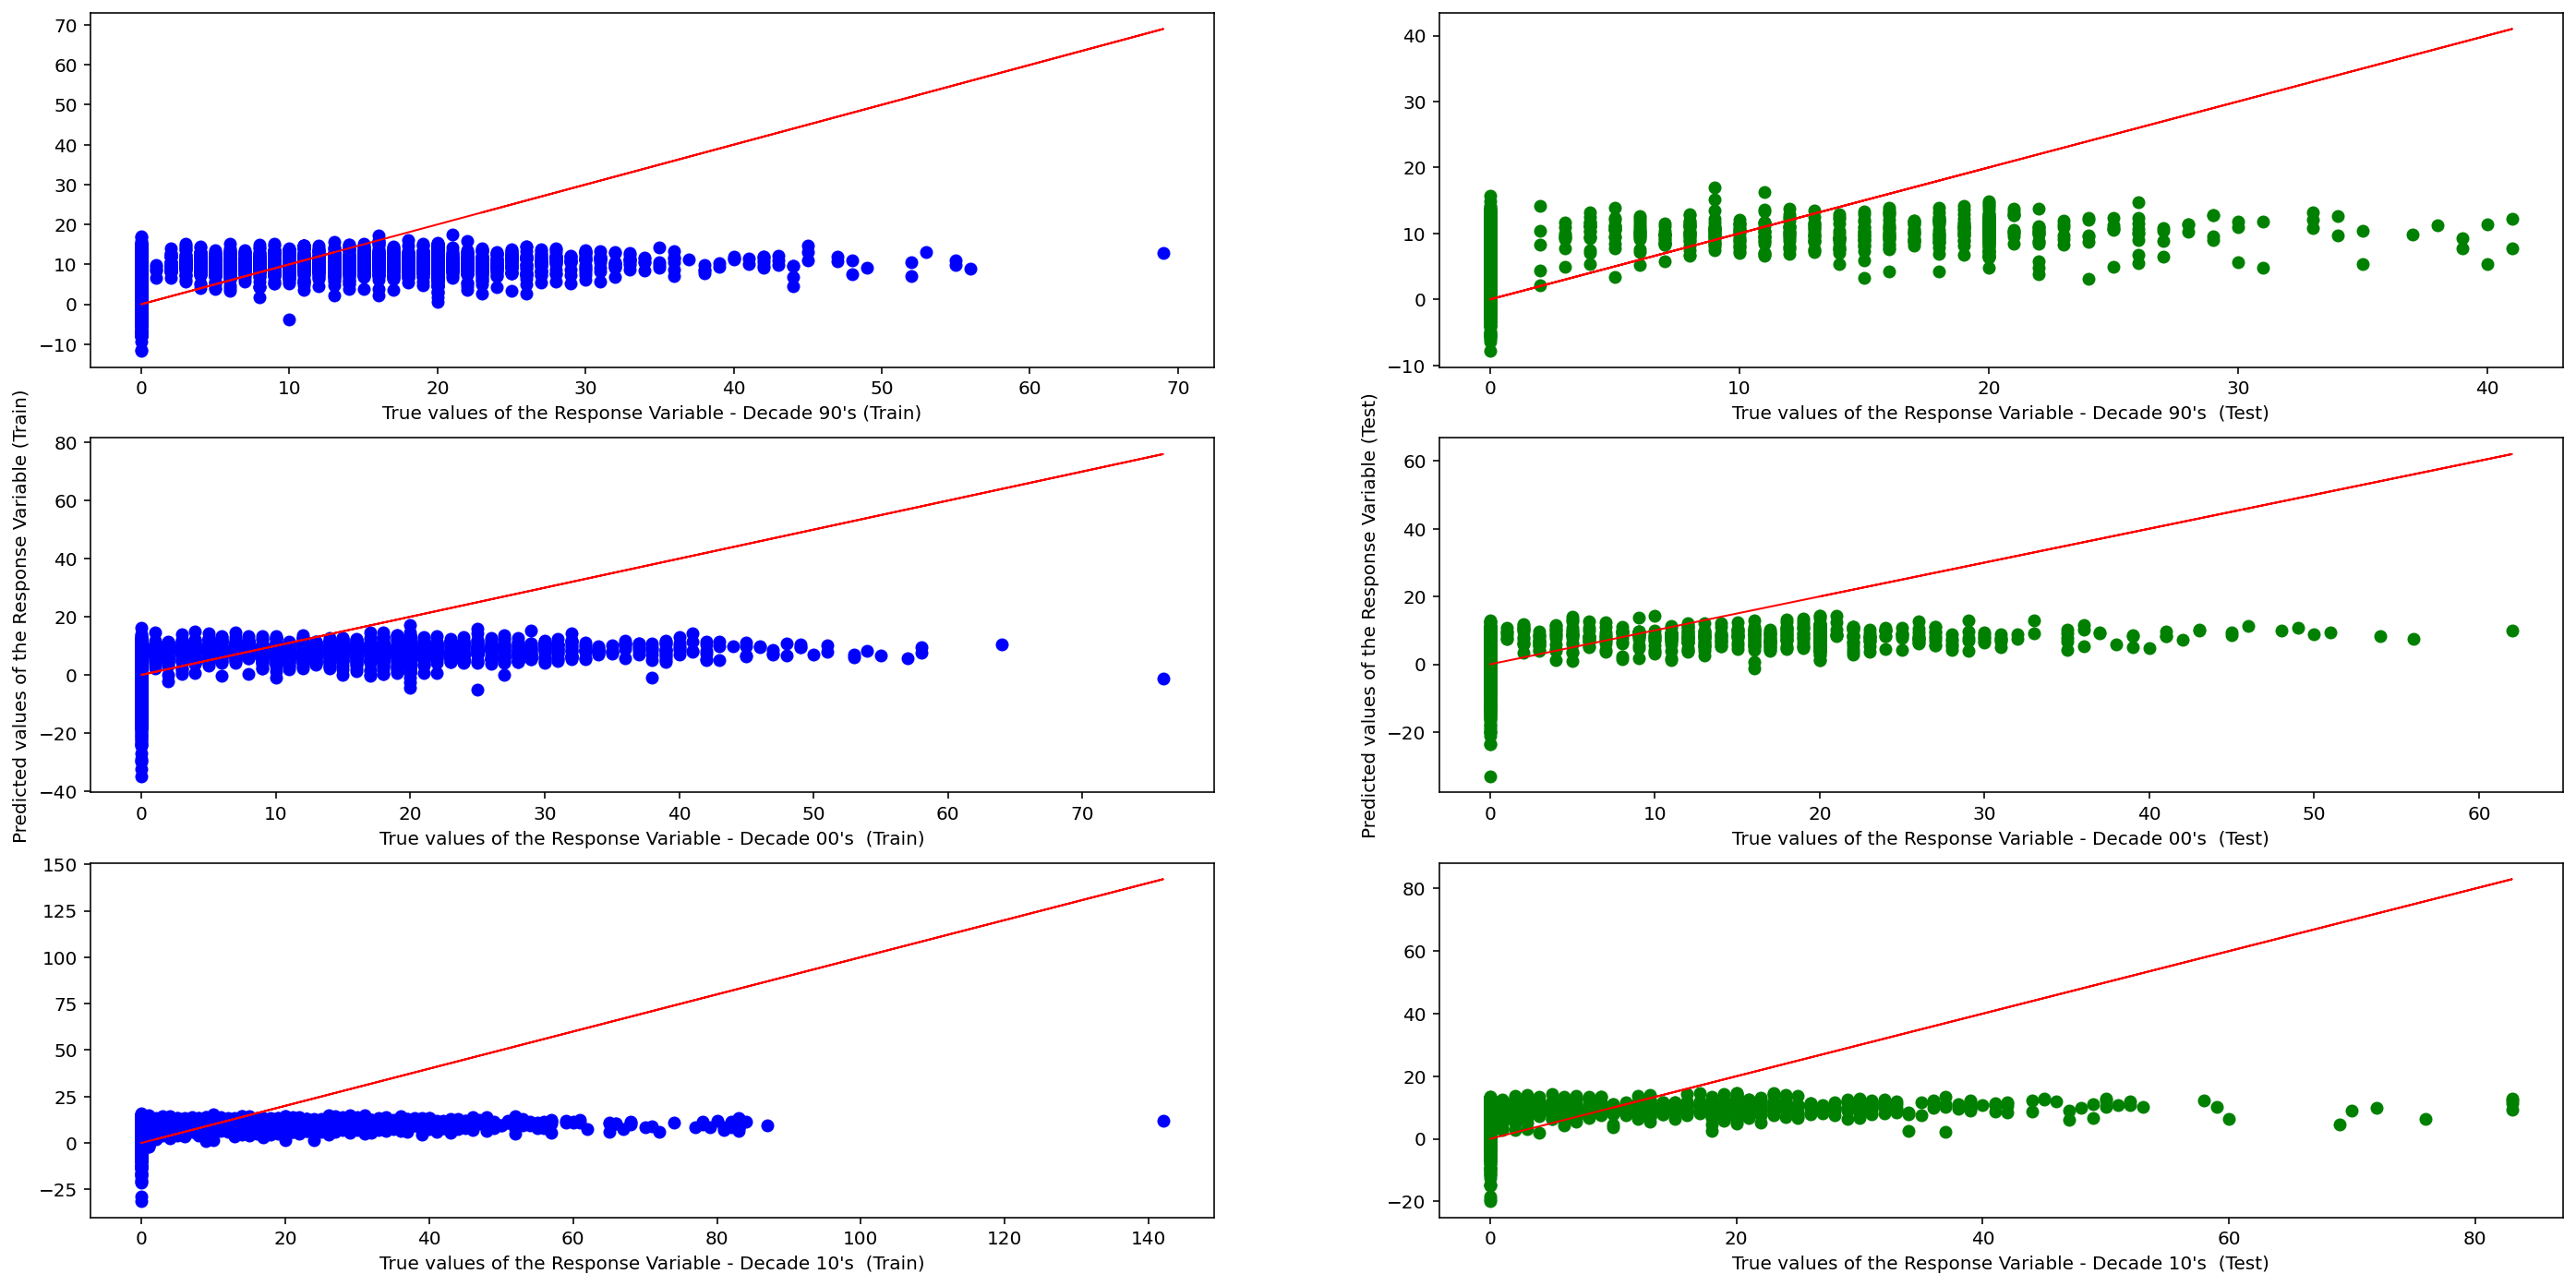

In [5]:
from sklearn.linear_model import LinearRegression

linreg90 = LinearRegression()
linreg00 = LinearRegression()
linreg10 = LinearRegression()

linreg90.fit(x_train90, y_train90lin)
linreg00.fit(x_train00, y_train00lin)
linreg10.fit(x_train10, y_train10lin)

linreg90.predict(x_test90)
linreg00.predict(x_test00)
linreg10.predict(x_test10)

# Predict SalePrice values corresponding to Predictors
y_train_pred90 = linreg90.predict(x_train90)
y_test_pred90 = linreg90.predict(x_test90)
y_train_pred00 = linreg10.predict(x_train00)
y_test_pred00 = linreg10.predict(x_test00)
y_train_pred10 = linreg10.predict(x_train10)
y_test_pred10 = linreg10.predict(x_test10)

# Plot the Predictions vs the True values
f, axes = plt.subplots(3, 2, figsize=(24, 12))
axes[0,0].scatter(y_train90lin, y_train_pred90, color = "blue")
axes[0,0].plot(y_train90lin, y_train90lin, 'r-', linewidth = 1)
axes[0,0].set_xlabel("True values of the Response Variable - Decade 90's (Train)")
axes[0,1].scatter(y_test90lin, y_test_pred90, color = "green")
axes[0,1].plot(y_test90lin, y_test90lin, 'r-', linewidth = 1)
axes[0,1].set_xlabel("True values of the Response Variable - Decade 90's  (Test)")


axes[1,0].scatter(y_train00lin, y_train_pred00, color = "blue")
axes[1,0].plot(y_train00lin, y_train00lin, 'r-', linewidth = 1)
axes[1,0].set_xlabel("True values of the Response Variable - Decade 00's  (Train)")
axes[1,0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1,1].scatter(y_test00lin, y_test_pred00, color = "green")
axes[1,1].plot(y_test00lin, y_test00lin, 'r-', linewidth = 1)
axes[1,1].set_xlabel("True values of the Response Variable - Decade 00's  (Test)")
axes[1,1].set_ylabel("Predicted values of the Response Variable (Test)")


axes[2,0].scatter(y_train10lin, y_train_pred10, color = "blue")
axes[2,0].plot(y_train10lin, y_train10lin, 'r-', linewidth = 1)
axes[2,0].set_xlabel("True values of the Response Variable - Decade 10's  (Train)")
axes[2,1].scatter(y_test10lin, y_test_pred10, color = "green")
axes[2,1].plot(y_test10lin, y_test10lin, 'r-', linewidth = 1)
axes[2,1].set_xlabel("True values of the Response Variable - Decade 10's  (Test)")
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error

linreg_score90 = linreg90.score(x_train90, y_train90lin)
linreg_score00 = linreg00.score(x_train00, y_train00lin)
linreg_score10 = linreg10.score(x_train10, y_train10lin)


print("Linear Regression score (90s): \t:", linreg_score90)
print("Mean Squared Error on train set (MSE) \t:", mean_squared_error(y_train90lin, y_train_pred90))
print("Mean Squared Error on test set(MSE) \t:", mean_squared_error(y_test90lin, y_test_pred90))
print()

print("Linear Regression score (00s): \t:", linreg_score00)
print("Mean Squared Error on train set (MSE) \t:", mean_squared_error(y_train00lin, y_train_pred00))
print("Mean Squared Error on test set(MSE) \t:", mean_squared_error(y_test00lin, y_test_pred00))
print()

print("Linear Regression score (10s): \t:", linreg_score10)
print("Mean Squared Error on train set (MSE) \t:", mean_squared_error(y_train10lin, y_train_pred10))
print("Mean Squared Error on test set(MSE) \t:", mean_squared_error(y_test10lin, y_test_pred10))

Linear Regression score (90s): 	: 0.1854943854920693
Mean Squared Error on train set (MSE) 	: 78.12696761888752
Mean Squared Error on test set(MSE) 	: 72.69656868548766

Linear Regression score (00s): 	: 0.18312419114463485
Mean Squared Error on train set (MSE) 	: 108.68562260096554
Mean Squared Error on test set(MSE) 	: 119.08715564382629

Linear Regression score (10s): 	: 0.105009265941709
Mean Squared Error on train set (MSE) 	: 140.32572745546847
Mean Squared Error on test set(MSE) 	: 130.69239797992284


Linear regression didn't seem to be working too well. It was at this point that we made the charted feature on the dataset, and moved on to classification.

## Logistic Regression

Our simplest form of classification, basically a sanity check for us before we move on to other models.

In [7]:
from sklearn.linear_model import LogisticRegression


THRESHOLD = 0.5

clf90 = LogisticRegression(class_weight="balanced")
clf90.fit(x_train90, y_train90)

log_preds90 = np.where(clf90.predict_proba(x_test90)[:,1] > THRESHOLD, 1, 0)

clf00 = LogisticRegression(class_weight="balanced")
clf00.fit(x_train00, y_train00)

log_preds00 = np.where(clf00.predict_proba(x_test00)[:,1] > THRESHOLD, 1, 0)

clf10 = LogisticRegression(class_weight="balanced")
clf10.fit(x_train10, y_train10)

log_preds10 = np.where(clf90.predict_proba(x_test10)[:,1] > THRESHOLD, 1, 0)

log_model_score90 = metric_score(y_test90, log_preds90)
log_model_score00 = metric_score(y_test00, log_preds00)
log_model_score10 = metric_score(y_test10, log_preds10)

Text(0.5, 1.0, 'Decade 10s')

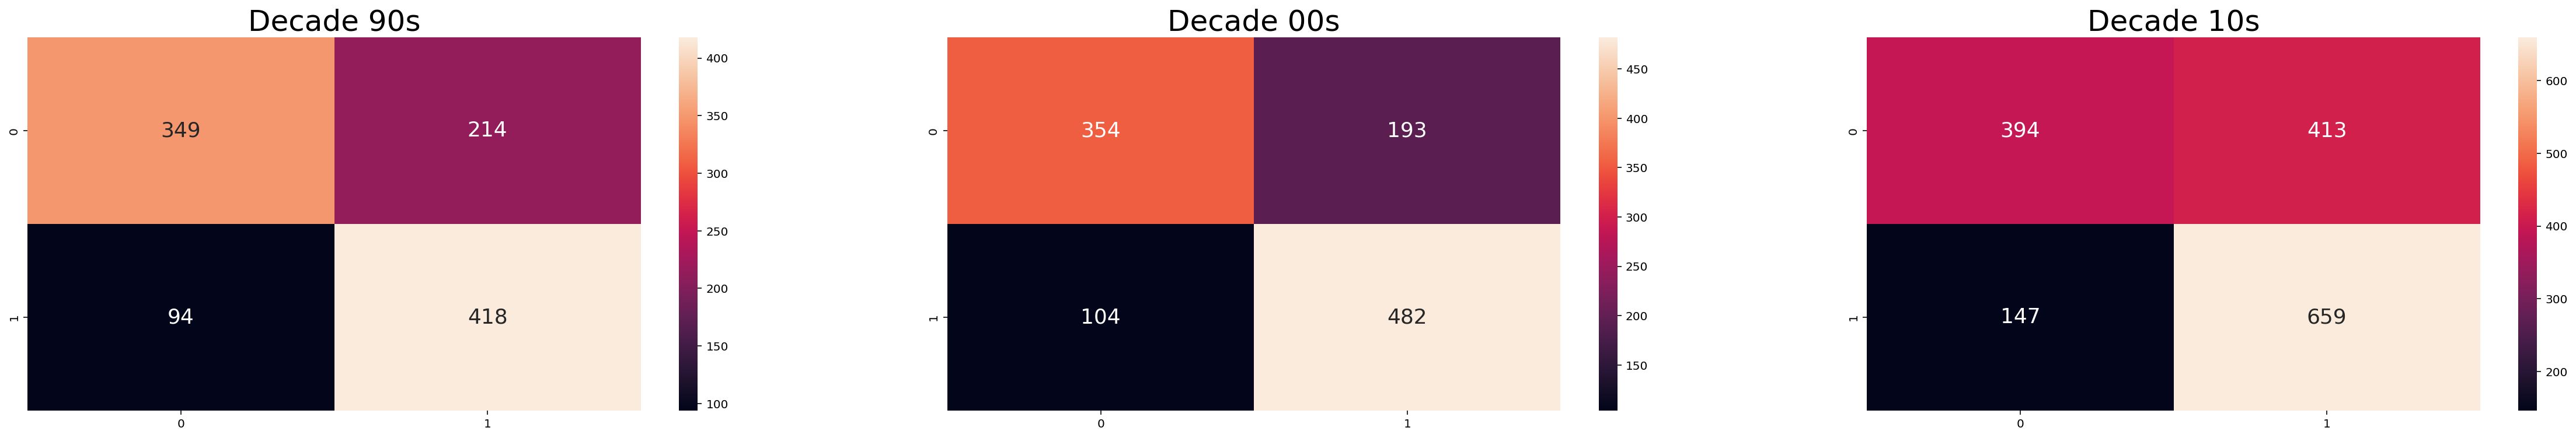

In [8]:
f = plt.figure(figsize=(40, 20))
ax1 = f.add_subplot(3, 3, 1) # row, column, position
ax2 = f.add_subplot(3, 3, 2)
ax3 = f.add_subplot(3, 3, 3)

sb.heatmap(confusion_matrix(y_test90, log_preds90), ax=ax1, annot = True, fmt=".0f", annot_kws={"size": 18})
ax1.set_title("Decade 90s", fontsize= 25)
sb.heatmap(confusion_matrix(y_test00, log_preds00), ax=ax2, annot = True, fmt=".0f", annot_kws={"size": 18})
ax2.set_title("Decade 00s", fontsize= 25)
sb.heatmap(confusion_matrix(y_test10, log_preds10), ax=ax3, annot = True, fmt=".0f", annot_kws={"size": 18})
ax3.set_title("Decade 10s", fontsize= 25)

In [9]:
log_scores = metricscores([log_preds90, log_preds00, log_preds10])

display(log_scores)

,decade,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
0,Decade 90,0.713488,0.816406,0.661392,0.730769,0.724601
1,Decade 00,0.737864,0.822526,0.714074,0.764473,0.743500
2,Decade 10,0.652821,0.817618,0.614739,0.701810,0.671510
3,Standard Deviation,0.035757,0.002646,0.040578,0.025606,0.030475


## Decision Tree Classifier

One of our simplest methods of classification, also part of our sanity check.

In [10]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
classifier = "Decision Tree"


# Decision Tree using Train Data
dectree90 = DecisionTreeClassifier(max_depth = 6)
dectree00 = DecisionTreeClassifier(max_depth = 6) 
dectree10 = DecisionTreeClassifier(max_depth = 6) 


dectree90.fit(x_train90, y_train90)
dectree00.fit(x_train00, y_train00)   
dectree10.fit(x_train10, y_train10)                  

# Predict Response corresponding to Predictors
dectree_pred90 = dectree90.predict(x_test90)
dectree_pred00 = dectree00.predict(x_test00)
dectree_pred10 = dectree10.predict(x_test10)

dec_test_score90 = metric_score(y_test90, dectree_pred90)
dec_test_score00 = metric_score(y_test00, dectree_pred00)
dec_test_score10 = metric_score(y_test10, dectree_pred10)

print(f"F1 Score for {classifier} on Decade 90 : {dec_test_score90}")
print(f"F1 Score for {classifier} on Decade 00 : {dec_test_score00}")
print(f"F1 Score for {classifier} on Decade 10 : {dec_test_score10}")

F1 Score for Decision Tree on Decade 90 : 0.7337770382695507
F1 Score for Decision Tree on Decade 00 : 0.7723516153268218
F1 Score for Decision Tree on Decade 10 : 0.7347649448636101


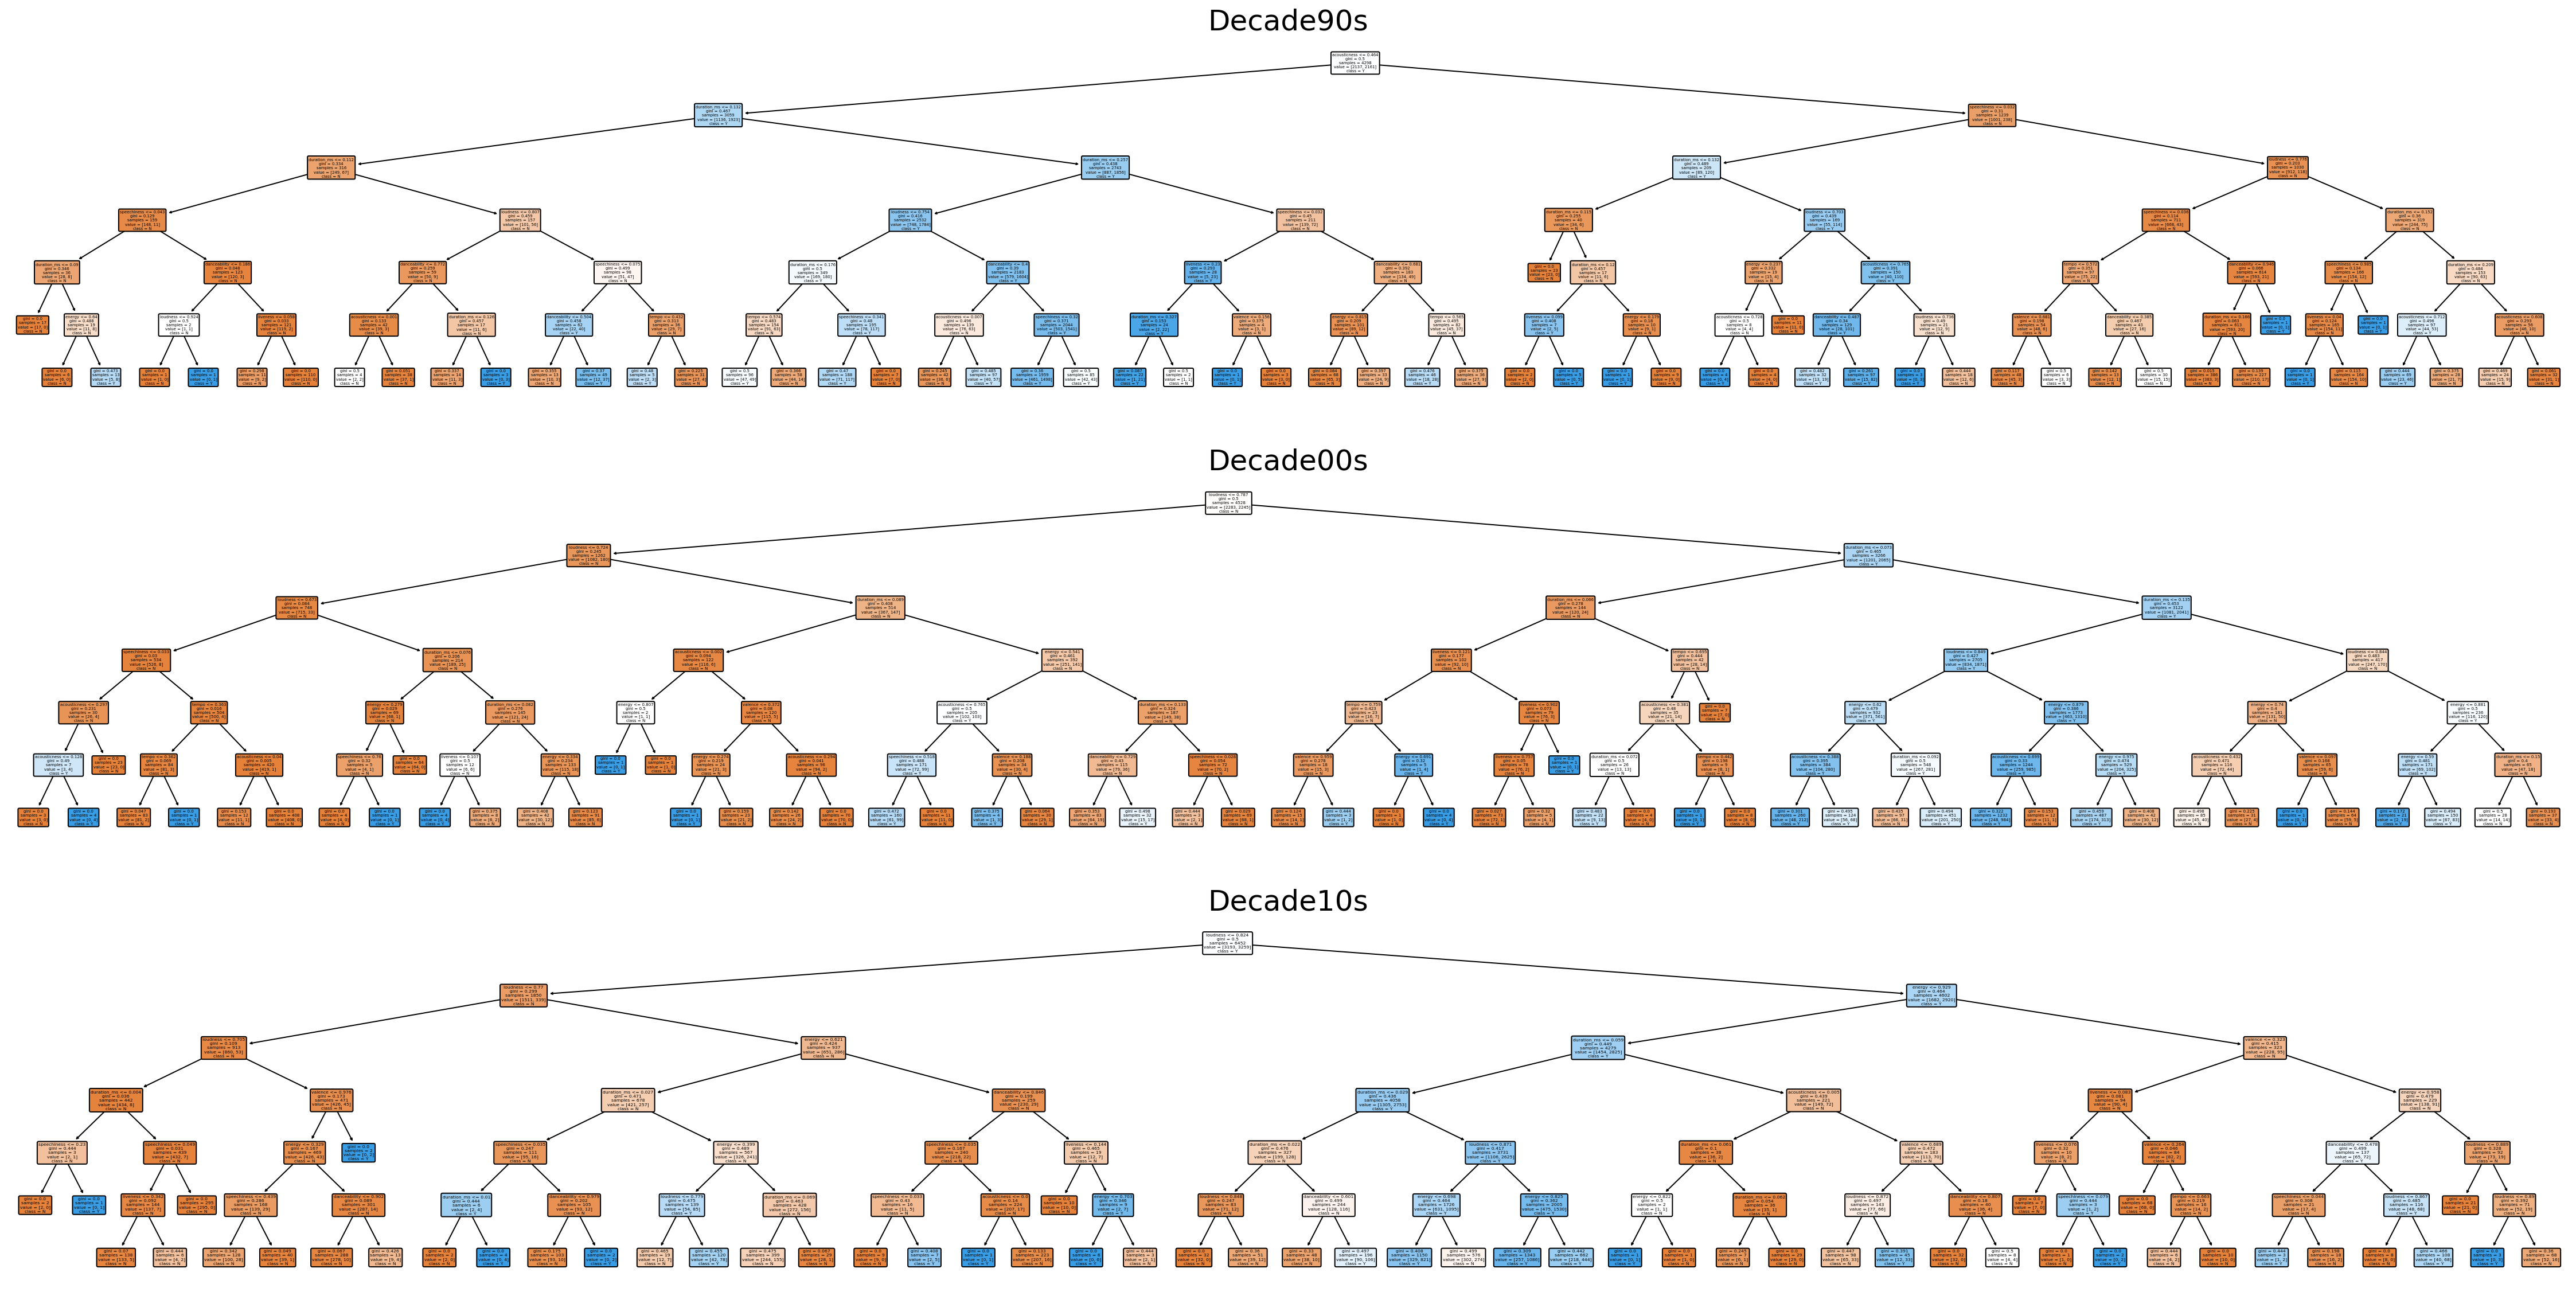

<Figure size 1080x720 with 0 Axes>

In [11]:
f = plt.figure(figsize=(40, 20))
ax1 = f.add_subplot(3, 1, 1) # row, column, position
ax2 = f.add_subplot(3, 1, 2)
ax3 = f.add_subplot(3, 1, 3)

fig = plt.figure(figsize=(15, 10))
plot_tree(dectree90, ax= ax1,
          feature_names=x_train90.columns,
          class_names=["N", "Y"], 
          filled=True, impurity=True, 
          rounded=True)

ax1.set_title("Decade90s", fontsize= 25)

plot_tree(dectree00, ax= ax2,
          feature_names=x_train00.columns,
          class_names=["N", "Y"], 
          filled=True, impurity=True, 
          rounded=True)

ax2.set_title("Decade00s", fontsize= 25)

plot_tree(dectree10, ax= ax3,
          feature_names=x_train10.columns,
          class_names=["N", "Y"], 
          filled=True, impurity=True, 
          rounded=True)

ax3.set_title("Decade10s", fontsize= 25)
plt.show()

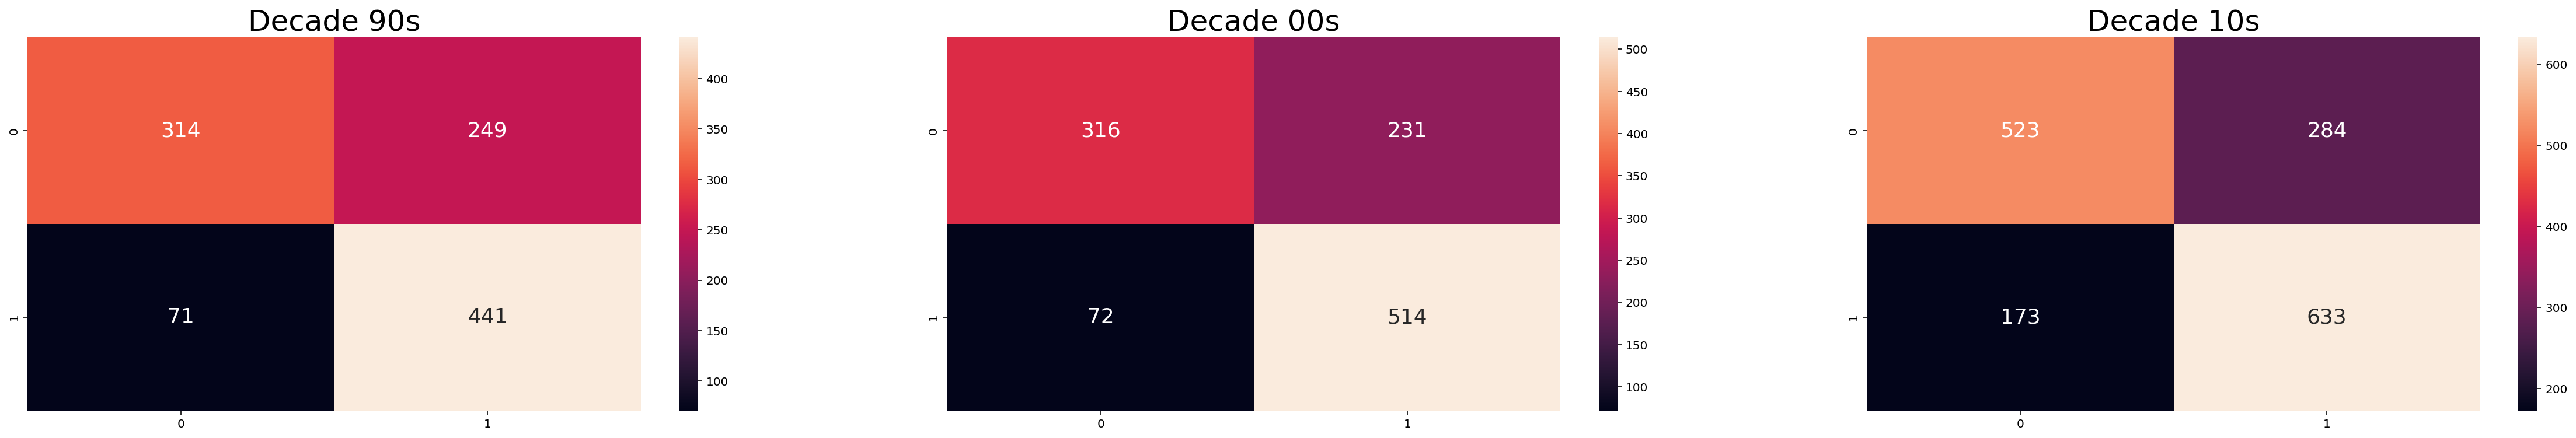

In [12]:
f = plt.figure(figsize=(40, 20))
ax1 = f.add_subplot(3, 3, 1) # row, column, position
ax2 = f.add_subplot(3, 3, 2)
ax3 = f.add_subplot(3, 3, 3)

sb.heatmap(confusion_matrix(y_test90, dectree_pred90), ax=ax1, annot = True, fmt=".0f", annot_kws={"size": 18})
ax1.set_title("Decade 90s", fontsize = 25)
sb.heatmap(confusion_matrix(y_test00, dectree_pred00), ax=ax2, annot = True, fmt=".0f", annot_kws={"size": 18})
ax2.set_title("Decade 00s", fontsize = 25)
sb.heatmap(confusion_matrix(y_test10, dectree_pred10), ax=ax3, annot = True, fmt=".0f", annot_kws={"size": 18})
ax3.set_title("Decade 10s", fontsize = 25)
plt.show()

## Random Forest

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Using the Random Forest module to perform both regression on weeks-on-board, and classification on charted.

### Basic Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = "Random Forest"

RF90 = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 6,
                                max_features = 'auto', 
                                min_samples_leaf = 60,
                                oob_score = False,
                                bootstrap = True, 
                                n_jobs = -1, 
                                random_state = 52)
RF00 = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 6,
                                max_features = 'auto', 
                                min_samples_leaf = 60,
                                oob_score = False,
                                bootstrap = True, 
                                n_jobs = -1, 
                                random_state = 52)
RF10 = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 6,
                                max_features = 'auto', 
                                min_samples_leaf = 60,
                                oob_score = False,
                                bootstrap = True, 
                                n_jobs = -1, 
                                random_state = 52)

RF90.fit(x_train90, y_train90)
RF00.fit(x_train00, y_train00)
RF10.fit(x_train10, y_train10)

rf_pred90 = RF90.predict(x_test90)
rf_pred00 = RF00.predict(x_test00)
rf_pred10 = RF10.predict(x_test10)

rf_score90 = metric_score(y_test90, rf_pred90)
rf_score00 = metric_score(y_test00, rf_pred00)
rf_score10 = metric_score(y_test10, rf_pred10)


print(f"F1 Score for {classifier} on Decade 90 : {rf_score90}")
print(f"F1 Score for {classifier} on Decade 00 : {rf_score00}")
print(f"F1 Score for {classifier} on Decade 10 : {rf_score10}")

F1 Score for Random Forest on Decade 90 : 0.740225890529974
F1 Score for Random Forest on Decade 00 : 0.7811023622047245
F1 Score for Random Forest on Decade 10 : 0.7495760316563029


### Grid Search Cross Validation for Regression

Trying out the Random Forest Regressor for weeks-on-board

Setting random grid and search grid to be used in cross validation searches

Reference: https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

and https://towardsdatascience.com/random-forest-regression-5f605132d19d

In [14]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

search_grid = { 
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth' : max_depth
}

pprint(random_grid)
pprint(search_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
classifier = "Random Forest Regressor"

def rfgs(x_train, x_test, y_trainlin, y_testlin):
    start = perf_counter()

    rf_search = GridSearchCV(estimator = RandomForestRegressor(random_state = 52), 
                            param_grid = search_grid, 
                            cv = 3)

    rf_search.fit(x_train, y_trainlin)
    end = perf_counter()
    
    display(rf_search.best_params_)
    print(f"Time elapsed : {int(end-start)//60}:{int(end-start)%60}")
    
    best_search = rf_search.best_estimator_
    rf_preds = best_search.predict(x_test)
    rf_scores = best_search.score(x_train, y_trainlin)
    
    
    
    return best_search, rf_preds, rf_scores

RF90s, rf_pred90s, rf_score90s = rfgs(x_train90, x_test90, y_train90lin, y_test90lin)
RF00s, rf_pred00s, rf_score00s = rfgs(x_train00, x_test00, y_train00lin, y_test00lin)
RF10s, rf_pred10s, rf_score10s = rfgs(x_train10, x_test10, y_train10lin, y_test10lin)


print(f"Accuracy for {classifier} on Decade 90 : {rf_score90s}")
print(f"Accuracy for {classifier} on Decade 00 : {rf_score00s}")
print(f"Accuracy for {classifier} on Decade 10 : {rf_score10s}")

### Randomized Search Cross Validation for Classification
Fitting 3 folds for each of 100 candidates, totalling 300 fits for each decade

Reference: https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb

In [ ]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

classifier = "Cross Validated Random Forest"

def rfcv(x_train, x_test, y_train, y_test):
    RF = RandomForestClassifier(random_state = 52)
    
    start = perf_counter()
    rf_random = RandomizedSearchCV(estimator = RF, 
                                   param_distributions = random_grid, 
                                   n_iter = 100, 
                                   scoring = 'f1', 
                                   cv = 3, 
                                   verbose = 2, 
                                   random_state = 52, 
                                   n_jobs = -1,
                                   error_score = 'raise',
                                   return_train_score = True)

    # Fit the random search model
    rf_random.fit(x_train, y_train);
    end = perf_counter()
    
    display(rf_random.best_params_)
    print(f"Time elapsed : {int(end-start)//60}:{int(end-start)%60}")
    
    best_random = rf_random.best_estimator_
    rf_predx = best_random.predict(x_test)
    rf_scorex = metric_score(y_test, rf_predx)
    
    return best_random, rf_predx, rf_scorex

RF90x, rf_pred90x, rf_score90x = rfcv(x_train90, x_test90, y_train90, y_test90)
RF00x, rf_pred00x, rf_score00x = rfcv(x_train00, x_test00, y_train00, y_test00)
RF10x, rf_pred10x, rf_score10x = rfcv(x_train10, x_test10, y_train10, y_test10)

print(f"F1 Score for {classifier} on Decade 90 : {rf_score90x}")
print(f"F1 Score for {classifier} on Decade 00 : {rf_score00x}")
print(f"F1 Score for {classifier} on Decade 10 : {rf_score10x}")

In [ ]:
rf_scores = metricscores([rf_pred90x, rf_pred00x, rf_pred10x])
display(rf_scores)

### Feature importance for random forest

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(26, 8), sharex = True)
fig.suptitle('Feature Importances across decades')
axs[0].barh(RF90.feature_names_in_, RF90x.feature_importances_, height = 1)
axs[0].set_title("Decade90")
axs[1].barh(RF00.feature_names_in_, RF00x.feature_importances_, height = 1)
axs[1].set_title("Decade00")
axs[2].barh(RF10.feature_names_in_, RF10x.feature_importances_, height = 1)
axs[2].set_title("Decade10")

plt.show()

### Plot tree to visualise random forest

In [ ]:
f = plt.figure(figsize=(30, 20))
ax1 = f.add_subplot(3, 1, 1) # row, column, position
ax2 = f.add_subplot(3, 1, 2)
ax3 = f.add_subplot(3, 1, 3)

fig = plt.figure(figsize=(15, 3))
plot_tree(RF90x.estimators_[50], ax= ax1,
          feature_names=x_train90.columns,
          class_names=["N", "Y"], 
          filled=True, impurity=True, 
          rounded=True)

ax1.set_title("Decade90s", fontsize= 25)

plot_tree(RF00x.estimators_[50], ax= ax2,
          feature_names=x_train00.columns,
          class_names=["N", "Y"], 
          filled=True, impurity=True, 
          rounded=True)

ax2.set_title("Decade00s", fontsize= 25)

plot_tree(RF10x.estimators_[50], ax= ax3,
          feature_names=x_train10.columns,
          class_names=["N", "Y"], 
          filled=True, impurity=True, 
          rounded=True)

ax3.set_title("Decade10s", fontsize= 25)
plt.show()

## K-Nearest Neighbors

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

Using K-Neighbors Classifier to work on the dataset. We ran 3 different for loops to find the optimal value for k for each decade, all while using the cross_val_score for verification.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
import seaborn as sns

# creating list of K for KNN
k_list90 = k_list00 = k_list10 = list(range(1,100,2))
# creating list of cv scores
cv_scores90 = []
cv_scores00 = []
cv_scores10 = []

# perform 10-fold cross validation
for k in k_list90:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train90, y_train90, cv=3, scoring='f1')
    cv_scores90.append(scores.mean())

for k in k_list00:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train00, y_train00, cv=3, scoring='f1')
    cv_scores00.append(scores.mean())

for k in k_list10:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train10, y_train10, cv=3, scoring='f1')
    cv_scores10.append(scores.mean())

# changing to misclassification error
MSE90 = [1 - x for x in cv_scores90]
MSE00 = [1 - x for x in cv_scores00]
MSE10 = [1 - x for x in cv_scores10]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list90, MSE90, label = 'Decade 90')
plt.plot(k_list00, MSE00, label = 'Decade 00')
plt.plot(k_list10, MSE10, label = 'Decade 10')

plt.show()

### Finding the number of neighbors and score for each decade

In [ ]:
classifier = "K-Neighbors"
def findmin(MSE): 
    min = 999
    minidx = 0
    for index, mse in enumerate(MSE):
        if mse < min:
            min = mse
            minidx = index
    return minidx

print(f"K-Neighbors for Decade90: {k_list90[findmin(MSE90)]}")
print(f"F1 Score for {classifier} on Decade 90 : {max(cv_scores90)}")
print(f"K-Neighbors for Decade00: {k_list00[findmin(MSE00)]}")
print(f"F1 Score for {classifier} on Decade 00 : {max(cv_scores00)}")
print(f"K-Neighbors for Decade10: {k_list10[findmin(MSE10)]}")
print(f"F1 Score for {classifier} on Decade 10 : {max(cv_scores10)}")

## Support Vector Classifier (SVM)

In [ ]:
from sklearn.svm import SVC
classifier = "SVM"

svm_model90 = SVC()
svm_model00 = SVC()
svm_model10 = SVC()

svm_model90.fit(x_train90, y_train90)
svm_model00.fit(x_train00, y_train00)
svm_model10.fit(x_train10, y_train10)

svm_predict90 = svm_model90.predict(x_test90)
svm_predict00 = svm_model00.predict(x_test00)
svm_predict10 = svm_model10.predict(x_test10)

svm_model_score90 = metric_score(y_test90, svm_predict90)
svm_model_score00 = metric_score(y_test00, svm_predict00)
svm_model_score10 = metric_score(y_test10, svm_predict10)

print(f"F1 Score for {classifier} on Decade 90 : {svm_model_score90}")
print(f"F1 Score for {classifier} on Decade 00 : {svm_model_score00}")
print(f"F1 Score for {classifier} on Decade 10 : {svm_model_score10}")

In [ ]:
svm_scores = metricscores([svm_predict90, svm_predict00, svm_predict10])

display(svm_scores)

In [ ]:
f = plt.figure(figsize=(40, 20))
ax1 = f.add_subplot(3, 3, 1) # row, column, position
ax2 = f.add_subplot(3, 3, 2)
ax3 = f.add_subplot(3, 3, 3)

sb.heatmap(confusion_matrix(y_test90, svm_predict90), ax=ax1, annot = True, fmt=".0f", annot_kws={"size": 18})
ax1.set_title("Decade 90s", fontsize = 25)
sb.heatmap(confusion_matrix(y_test00, svm_predict00), ax=ax2, annot = True, fmt=".0f", annot_kws={"size": 18})
ax2.set_title("Decade 00s", fontsize = 25)
sb.heatmap(confusion_matrix(y_test10, svm_predict10), ax=ax3, annot = True, fmt=".0f", annot_kws={"size": 18})
ax3.set_title("Decade 10s", fontsize = 25)
plt.show()

## Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = "GNB"

gnb_model90 = GaussianNB()
gnb_model00 = GaussianNB()
gnb_model10 = GaussianNB()


gnb_model90.fit(x_train90, y_train90)
gnb_model00.fit(x_train00, y_train00)
gnb_model10.fit(x_train10, y_train10)

gnb_predict90 = gnb_model90.predict(x_test90)
gnb_predict00 = gnb_model00.predict(x_test00)
gnb_predict10 = gnb_model10.predict(x_test10)

gnb_model_score90 = metric_score(y_test90, gnb_predict90)
gnb_model_score00 = metric_score(y_test00, gnb_predict00)
gnb_model_score10 = metric_score(y_test10, gnb_predict10)

print(f"F1 Score for {classifier} on Decade 90 : {gnb_model_score90}")
print(f"F1 Score for {classifier} on Decade 00 : {gnb_model_score00}")
print(f"F1 Score for {classifier} on Decade 10 : {gnb_model_score10}")

In [ ]:
gnb_scores = metricscores([gnb_predict90, gnb_predict00, gnb_predict10])

display(gnb_scores)

In [ ]:
f = plt.figure(figsize=(40, 20))
ax1 = f.add_subplot(3, 3, 1) # row, column, position
ax2 = f.add_subplot(3, 3, 2)
ax3 = f.add_subplot(3, 3, 3)

sb.heatmap(confusion_matrix(y_test90, gnb_predict90), ax=ax1, annot = True, fmt=".0f", annot_kws={"size": 18})
ax1.set_title("Decade 90s", fontsize = 25)
sb.heatmap(confusion_matrix(y_test00, gnb_predict00), ax=ax2, annot = True, fmt=".0f", annot_kws={"size": 18})
ax2.set_title("Decade 00s", fontsize = 25)
sb.heatmap(confusion_matrix(y_test10, gnb_predict10), ax=ax3, annot = True, fmt=".0f", annot_kws={"size": 18})
ax3.set_title("Decade 10s", fontsize = 25)
plt.show()

## Conclusion

In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Bar(
    x=["Linear Regression", "Random Forest Regressor", "Random Forest Classifier", "Logistic Regression", "K Nearest Neighbours", "Support Vector Machine", "Gaussian Naive Bayes ", "Decision Tree"],
    y=[linreg_score90, rf_score90s, rf_score90x, log_model_score90,  max(cv_scores90), svm_model_score90, gnb_model_score90, dec_test_score90 ],
    name='Decade90',
    marker_color='indianred',
))
fig.add_trace(go.Bar(
    x=["Linear Regression", "Random Forest Regressor", "Random Forest Classifier", "Logistic Regression", "K Nearest Neighbours", "Support Vector Machine", "Gaussian Naive Bayes " , "Decision Tree"],
    y=[linreg_score00, rf_score00s, rf_score00x, log_model_score00,  max(cv_scores00), svm_model_score00, gnb_model_score00, dec_test_score00],
    name='Decade00',
    marker_color='grey'
))

fig.add_trace(go.Bar(
    x=["Linear Regression", "Random Forest Regressor", "Random Forest Classifier", "Logistic Regression", "K Nearest Neighbours", "Support Vector Machine", "Gaussian Naive Bayes ", "Decision Tree"],
    y=[linreg_score10, rf_score10s, rf_score10x, log_model_score10,  max(cv_scores10), svm_model_score10, gnb_model_score10, dec_test_score10],
    name='Decade10',
    marker_color='blue'
))
fig.update_layout(font=dict(size=12))

fig.show()

In [ ]:
fig.write_image("images/fig1.png", format="png", width=2000, height=500, scale=2)

In [ ]:
names = ["Decade", "Linear Regression", "Random Forest Regressor", "Random Forest Classifier", "Logistic Regression", "K Nearest Neighbours", "Support Vector Machine", "Gaussian Naive Bayes ", "Decision Tree"]
scores90 = ["Decade90", linreg_score90, rf_score90s, rf_score90x, log_model_score90,  max(cv_scores90), svm_model_score90, gnb_model_score90, dec_test_score90]
scores00 = ["Decade00", linreg_score00, rf_score00s, rf_score00x, log_model_score00,  max(cv_scores00), svm_model_score00, gnb_model_score00, dec_test_score00]
scores10 = ["Decade10", linreg_score10, rf_score10s, rf_score10x, log_model_score10,  max(cv_scores10), svm_model_score10, gnb_model_score10, dec_test_score10]

scoresdf = pd.DataFrame([scores90, scores00, scores10], columns = [names])
display(scoresdf)